<a href="https://colab.research.google.com/github/SamLutz/2024_MLEES/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project MLEES SA24


In [ ]:
#Upload dataset
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# Install netcdf4 and xarray
!pip install netCDF4
!pip install xarray

In [ ]:
# Import data and put it in one array
import os
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from datetime import datetime
import pooch
import netCDF4 as nc
import matplotlib.pyplot as plt

In [ ]:
# Retrieve the files from the cloud using Pooch.
data_url = 'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EUpqQHVd0GZJoSW30vCSRRUBAksxtbtOnyHypcNclwKiAg?download=1'
hash = None
files = pooch.retrieve(data_url, known_hash=hash)
# Directory containing the NetCDF files
data = nc.Dataset(files)
# Prepare a list to store data from all files
data.variables.keys()



dict_keys(['time', 'depth', 'temp', 'surfacetemp', 'bottomtemp', 'mixed_layer_depth', 'thermocline_depth', 'schmidt_stability', 'heat_content'])

In [ ]:
surface_temp=data.variables["surfacetemp"][:]
time=data.variables["time"][:]/86400-18077.916666666668 # bring the time to be 0 on the 1st of january 2020
temp_air=data.variables["temp"][:]

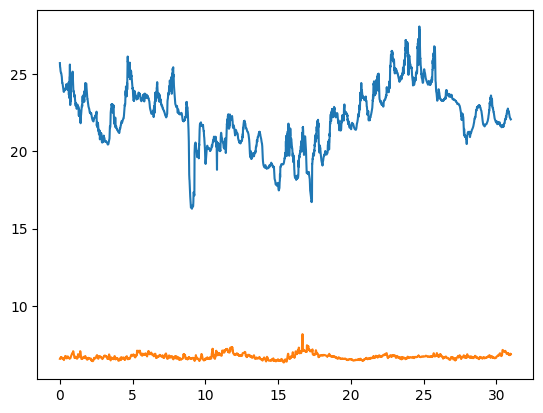

In [ ]:
plt.plot(time,surface_temp)
plt.plot(time,temp_air[47])
plt.show()

In [ ]:
time[0]

18077.916666666668

In [ ]:
https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EUr8y2J9-q5IlmXhA1S-UuwBNt6c2Ruf7sZbET5WfAJxsA?e=bPaxH5

In [ ]:
# Retrieve the files from the cloud using Pooch.
data_url = 'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EUr8y2J9-q5IlmXhA1S-UuwBNt6c2Ruf7sZbET5WfAJxsA?download=1'
hash = None
files = pooch.retrieve(data_url, known_hash=hash)
# Directory containing the NetCDF files
data = nc.Dataset(files)
# Prepare a list to store data from all files
data.variables.keys()



SHA256 hash of downloaded file: 6eb3beab8d4616c9655e90ae492df52c376ef7153f3f73b4e9ce63456c265d3b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


dict_keys(['time', 'depth', 'temp', 'surfacetemp', 'bottomtemp', 'mixed_layer_depth', 'thermocline_depth', 'schmidt_stability', 'heat_content'])

In [ ]:
surface_temp=data.variables["surfacetemp"][:]
time=data.variables["time"][:]/86400-18077.916666666668 # bring the time to be 0 on the 1st of january 2020
temp_air=data.variables["temp"][:]

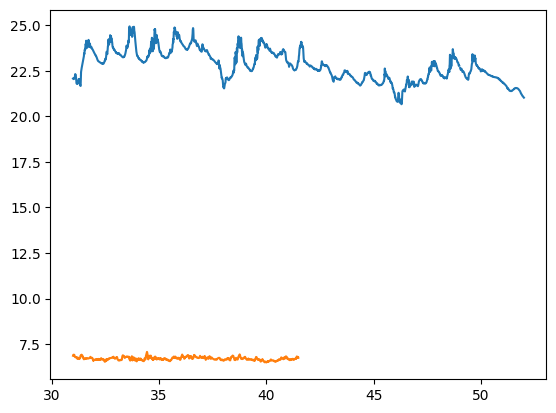

In [ ]:
plt.plot(time,surface_temp)
plt.plot(time,temp_air[47])
plt.show()

In [ ]:
2677800.0/(60*60*24)

30.993055555555557

In [ ]:





# Loop through each NetCDF file in the directory
for filename in os.listdir(data):
    if filename.endswith('.nc'):
        file_path = os.path.join(data, filename)

        # Open the NetCDF file
        with Dataset(file_path, 'r') as nc_file:
            # Extract variables
            unix_time = nc_file.variables['time'][:]
            air_temp = nc_file.variables['AirTC'][:]
            solar_radiation = nc_file.variables['Slrw'][:]
            wind_speed = nc_file.variables['WS'][:]

            # Convert Unix time to datetime
            datetime_times = [datetime.utcfromtimestamp(t) for t in unix_time]

            # Combine into a structured array and append to list
            file_data = np.array(list(zip(datetime_times, air_temp, solar_radiation, wind_speed)),
                                 dtype=[('time', 'O'), ('AirTC', 'f4'), ('SlrW', 'f4'), ('WS', 'f4')])
            data_list.append(file_data)

# Combine all data into a single NumPy array
meteo = np.concatenate(data_list)

# Verify contents
print(meteo[:5])  # Display the first 5 records

HTTPError: 403 Client Error: Forbidden for url: https://unils-my.sharepoint.com/:f:/g/personal/samuel_lutz_unil_ch/Eo2yOMgtzXtGsTx64_hvGq4BxrtEaoDLd5A_u1KKMhVfKA?e=Cz53Wg

In [ ]:
# Importer les bibliothèques nécessaires
import xarray as xr
import numpy as np
import glob

# Étape 1 : Charger les fichiers .nc
# Liste de tous les fichiers .nc uploadés dans le dossier /content
file_paths = glob.glob('/content/*.nc')

# Liste pour stocker les données sélectionnées
data_arrays = []

# Étape 2 : Boucle pour charger chaque fichier et extraire les variables d'intérêt
for file_path in file_paths:
    # Ouvrir le fichier .nc
    dataset = xr.open_dataset(file_path)

    # Extraire les données de variables spécifiques
    # (remplace 'temp_air' et 'solar_radiation' par les noms exacts de tes variables)

    temp_air = dataset['AirTC'].values
    solar_radiation = dataset['Slrw'].values
    unix_time = dataset['time'].values
    wind_speed = dataset['WS'].values

    # Regrouper les données extraites dans un tableau numpy
    combined_array = np.stack((unix_time, temp_air, solar_radiation, wind_speed), axis=-1)

    # Ajouter ce tableau à la liste de données
    data_arrays.append(combined_array)

# Étape 3 : Combiner toutes les données des fichiers dans un seul array numpy
final_data_array = np.concatenate(data_arrays, axis=0)

# Afficher la forme du tableau final pour vérification
print("Taille du tableau final :", final_data_array.shape)
print(final_data_array)


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html